In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
data=pd.read_csv('forestfires.csv')

In [ ]:
data

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

In [ ]:
data1=data.drop(columns=['monthjan','monthfeb','monthmar','monthapr','monthmay','monthjun','monthjul','monthaug','monthsep','monthoct','monthnov','monthdec',
                         'daysun','daymon','daytue','daywed','daythu','dayfri','daysat'],axis=1)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [ ]:
data1.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area  
count  517.000000  517.000000   517.000000  
mean     4.017602    0.021663    12.847292  
std      1.791653    0.295959    63.655818  
min      0.400000    0.000000     0.000000  
25%      2.700000    0.000000     0.000000  
50%      4.000000    0.000000     0.520000  
75%      4.900000    0.000000     6.570000  
max      9.400000    6.400000  1090.840000

In [ ]:
data1[data1.duplicated()].count()

month            8
day              8
FFMC             8
DMC              8
DC               8
ISI              8
temp             8
RH               8
wind             8
rain             8
area             8
size_category    8
dtype: int64

In [ ]:
df=data1.drop_duplicates()

In [ ]:
df[df.duplicated()].count()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

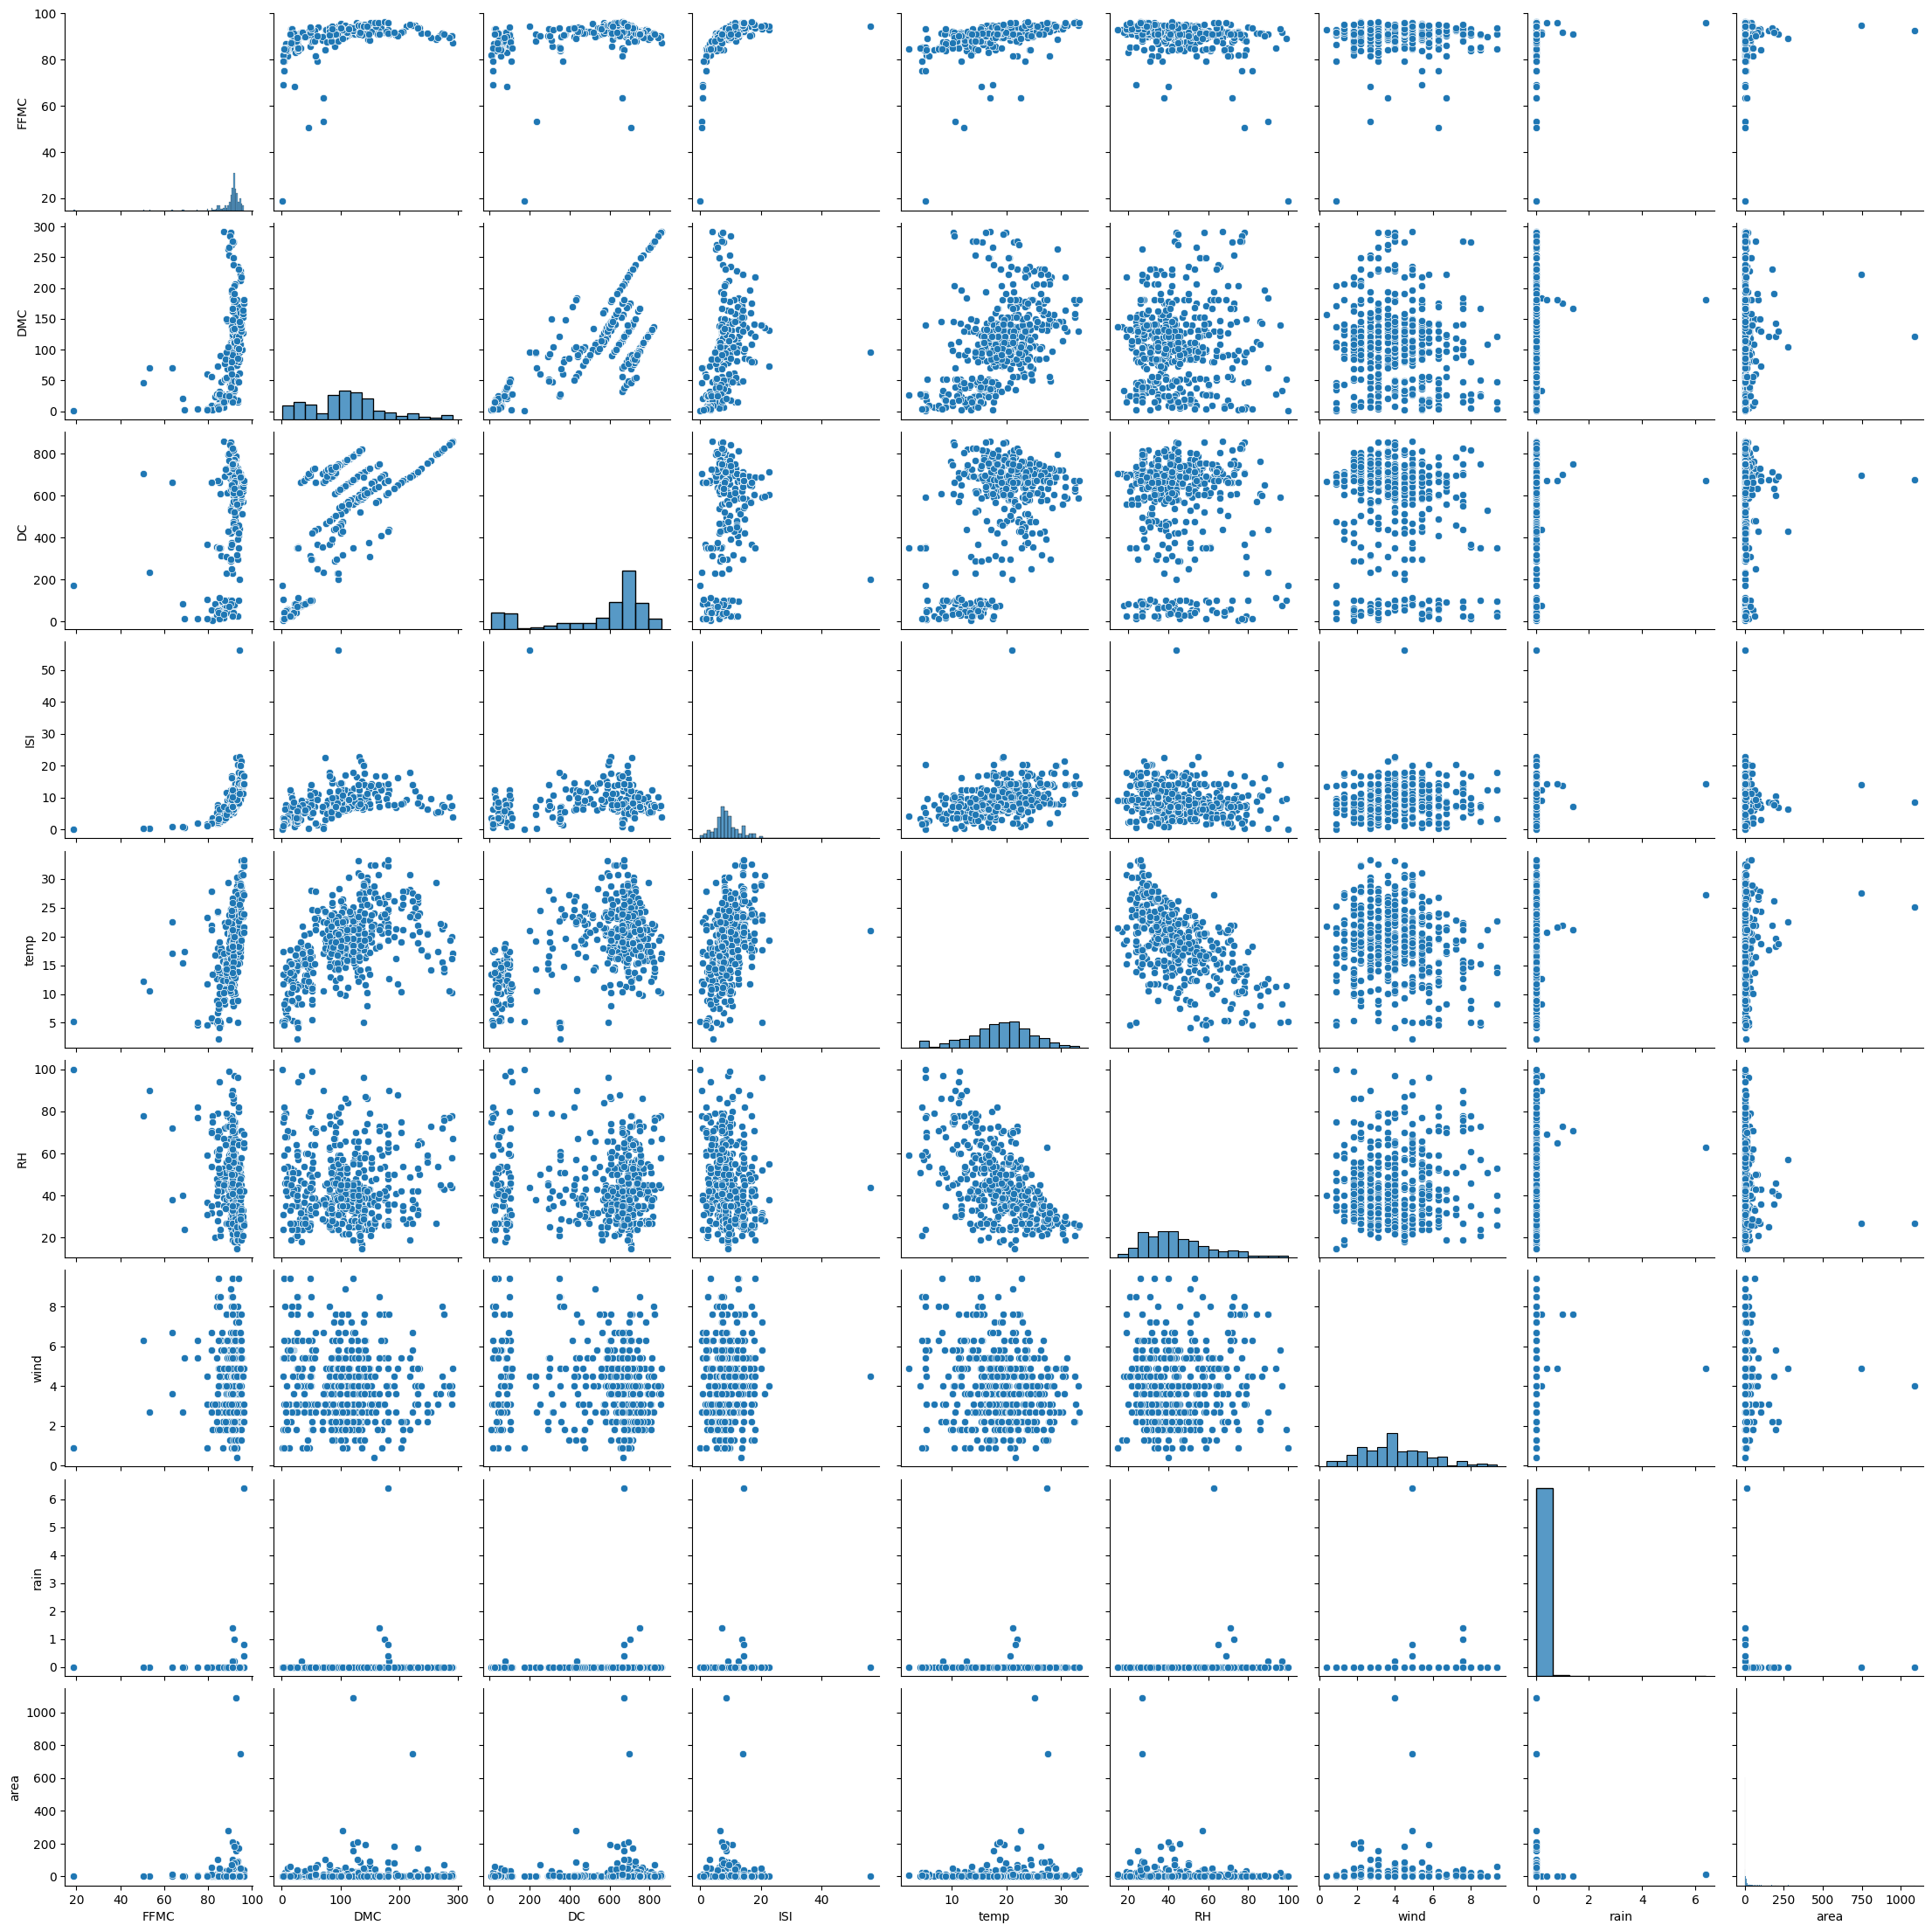

In [ ]:
sns.pairplot(df)

In [ ]:
cor = df.corr(method='pearson')
cor.style.background_gradient(cmap='coolwarm')

<ipython-input-20-db9fb0c97393>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr(method='pearson')


In [ ]:
x=df.iloc[:,2:11]
y=df.iloc[:,11]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
clf = SVC()
param_grid = [{'kernel':['linear','rbf'],'gamma':[0.5,0.1,0.01],'C':[10,0.1,0.001,0.0001] }]
gsv = RandomizedSearchCV(clf,param_grid,cv=10,verbose=300)
gsv.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 1/10; 1/10] END C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 2/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 2/10; 1/10] END C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 3/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 3/10; 1/10] END C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 4/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 4/10; 1/10] END C=0.1, gamma=0.1, kernel=rbf;, score=0.732 total time=   0.0s
[CV 5/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 5/10; 1/10] END C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 6/10; 1/10] START C=0.1, gamma=0.1, kernel=rbf..............................
[CV 6/10; 1/10] END C=0.1, gamma=0.1, ker

RandomizedSearchCV(cv=10, estimator=SVC(),
                   param_distributions=[{'C': [10, 0.1, 0.001, 0.0001],
                                         'gamma': [0.5, 0.1, 0.01],
                                         'kernel': ['linear', 'rbf']}],
                   verbose=300)

In [ ]:
gsv.best_params_,gsv.best_score_

({'kernel': 'linear', 'gamma': 0.01, 'C': 0.001}, 0.963109756097561)

In [ ]:
clf=SVC(kernel='linear',gamma=0.01,C=0.1)
clf.fit(x_train,y_train)

SVC(C=0.1, gamma=0.01, kernel='linear')

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print('Accuracy=',acc)


Accuracy= 0.9901960784313726


In [ ]:
confusion_matrix(y_test,y_pred)

array([[25,  0],
       [ 1, 76]])

In [ ]:
y_pred

array(['small', 'small', 'small', 'large', 'large', 'small', 'large',
       'small', 'small', 'large', 'large', 'large', 'small', 'large',
       'small', 'small', 'small', 'large', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'large', 'large', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'large', 'small',
       'small', 'small', 'large', 'small', 'small', 'small', 'small',
       'small', 'small', 'large', 'large', 'small', 'small', 'small',
       'small', 'small', 'large', 'large', 'large', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'large', 'large', 'small', 'small', 'small', 'small', 'small',
       'small', 'large', 'large', 'small', 'large', 'small', 'large',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       large       1.00      0.96      0.98        26
       small       0.99      1.00      0.99        76

    accuracy                           0.99       102
   macro avg       0.99      0.98      0.99       102
weighted avg       0.99      0.99      0.99       102

